In [29]:
import tensorflow as tf
from pilco.policies.rbf_policy import RBFPolicy

from tqdm import trange

In [30]:
rbf_policy = RBFPolicy(2, 1, 5, dtype=tf.float32)
rbf_policy.reset()

In [31]:
loc = tf.zeros(2, dtype=tf.float32)
cov = tf.eye(2, dtype=tf.float32)

mean_u, cov_su, cov_uu = rbf_policy.match_moments(loc, cov)

cov1 = tf.concat([cov, cov_su[None, :]], axis=0)
cov2 = tf.concat([cov_su[:, None], cov_uu[None, None]], axis=0)

cov_full = tf.concat([cov1, cov2], axis=1)

print(tf.reduce_all(tf.cast(tf.linalg.eig(cov_full)[0], dtype=tf.float32) > 0))

print(cov_full)

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(
[[ 1.          0.          0.05171026]
 [ 0.          1.         -0.04337988]
 [ 0.05171026 -0.04337988  0.28929228]], shape=(3, 3), dtype=float32)


In [32]:
num_samples = 10**5

states = []
actions = []

for i in trange(num_samples):
    
    s = tf.random.normal(mean=0., stddev=1., shape=(2,))
    
    u = rbf_policy(s)
    
    states.append(s)
    actions.append(u)
    
s = tf.convert_to_tensor(states)
u = tf.convert_to_tensor(actions)

100%|██████████| 100000/100000 [00:55<00:00, 1788.08it/s]


In [33]:
tf.reduce_mean(u), mean_u

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.78420466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.32783857>)

In [34]:
tf.reduce_mean(u ** 2) - tf.reduce_mean(u) ** 2

<tf.Tensor: shape=(), dtype=float32, numpy=0.45540303>

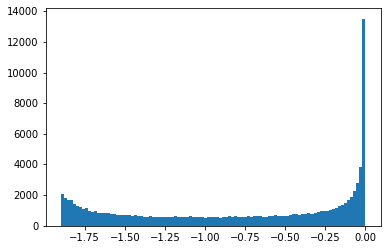

In [37]:
import matplotlib.pyplot as plt

plt.hist(u, bins=100)
plt.show()